In [140]:
import requests
import igraph
from igraph import Graph
from get_author_data10 import open_alex_AND
import matplotlib
import networkx
import json


This code creates a graph of papers where edges represent one paper referencing another

In [97]:
class work_info:
    def __init__(self, wID):
        self.ID = wID
        self.get_info()
        self.make_info_dict()

    def get_info(self):
        fullquery = "https://api.openalex.org/works/" + self.ID
        response = requests.get(fullquery)
        response.raise_for_status()  # raises exception when not a 2xx response
        if response.status_code != 204:
            self.data = response.json()
    
    def get_type(self):
        return self.data["type"]

    def get_cited_by(self):
        response = requests.get(self.data["cited_by_api_url"])
        response.raise_for_status()
        if response.status_code != 204:
            cited_by = response.json()
            cited_by_list = []
            for i in cited_by["results"]:
                id = i["id"].replace("https://openalex.org/", "")
                cited_by_list.append(id)
            return cited_by_list
    
    def get_grants_and_funders(self):
        dict = {"grants": [], "funders": []}
        self.grants = []
        self.funders = []
        for i in self.data["grants"]:
            dict["funders"].append(i["funder"].replace("https://openalex.org/", ""))
            if i["award_id"] != "null":
                dict["grants"].append(i["award_id"])
        return dict
    
    def get_references(self):
        references = []
        for i in self.data["referenced_works"]:
            references.append(i.replace("https://openalex.org/", ""))
        return references
        
    def get_authors(self):
        coauthors = []
        for i in self.data["authorships"]:
            coauthors.append(i["author"]["id"].replace("https://openalex.org/", ""))
        return coauthors
    
    def get_institutions(self):
        institutions = []
        for i in self.data["authorships"]:
            for j in i["institutions"]:
                institutions.append(j["id"].replace("https://openalex.org/", ""))
        return institutions
    
    def get_year(self):
        return self.data["publication_year"]

    def make_info_dict(self):
        self.type = self.get_type()
        self.cited_by = self.get_cited_by()
        self.grants = self.get_grants_and_funders()["grants"]
        self.funders = self.get_grants_and_funders()["funders"]
        self.references = self.get_references()
        self.authors = self.get_authors()
        self.institutions = self.get_institutions()
        self.year = self.get_year()
        self.info_dict = {"id": self.ID,
                          "type": self.type, 
                          "cited_by": self.cited_by, 
                          "grants": self.grants,
                          "funders": self.funders,
                          "references": self.references,
                          "authors": self.authors, 
                          "institutions": self.institutions,
                          "year": self.year
                          }


In [201]:
class works_graph:
    def __init__(self, wIDs):
        self.nodes = set(wIDs)
        self.dictionary = {}
        for wID in wIDs:
            self.dictionary[wID] = []
        self.already_checked = []
        self.data_dictionary = {}

    def get_data(self, work):
        if work in self.data_dictionary.keys():
            return self.data_dictionary[work]
        else:
            w = work_info(work)
            self.data_dictionary[work] = w
            return w
    
    def choose_best(self, work, works_list):
        score_dict = {}
        for w in works_list:
            new_work = self.get_data(w)
            authors = set(work.authors).intersection(set(new_work.authors)) 
            institutions = set(work.institutions).intersection(set(new_work.institutions))
            year = 1 if work.year == new_work.year else 0
            score = len(authors) + len(institutions) + year
            score_dict[w] = score
        new_list = []
        while len(new_list) < 5 and len(score_dict) > 0:
            best_work = max(score_dict, key = score_dict.get)
            print(best_work, score_dict[best_work])
            new_list.append(best_work)
            score_dict.pop(best_work)
        return new_list
    
    def add_generation(self):
        new_nodes = []
        for i in self.nodes:
            if i not in self.already_checked:
                w = self.get_data(i)
                cited_by_list = self.choose_best(w, w.cited_by)
                for j in cited_by_list:
                    if j not in self.nodes:
                        new_nodes.append(j)
                        print(j)
                        self.dictionary[j] = []
                    self.dictionary[i].append(j)
                references_list = self.choose_best(w, w.references)
                for k in references_list:
                    if k not in self.nodes:
                        new_nodes.append(k)
                        print(k)
                        self.dictionary[k] = []
                    self.dictionary[k].append(i)
                self.already_checked.append(i)
        for i in new_nodes:
            self.nodes.add(i)

    def make_graph(self):
        while len(self.nodes) < 100:
            self.add_generation()
        self.igraph = Graph.ListDict(self.dictionary, directed = True)
        self.nxgraph = networkx.DiGraph(self.dictionary, directed = True)

Charles Sawyer sloan kettering memorial chemo therapy? Druker find original paper about drug from the 90s

In [63]:
test1 = works_graph("W2329648702")

In [110]:
test2 = works_graph("W2329648702")

In [125]:
test3 = works_graph("W2329648702")

In [64]:
test1.make_graph()

W2043696829
W2163188200
W2055402151
W2015015957
W1639582946
W2041535798
W2028959752
W2107268345
W1999614615
W2057360098
W2008945738
W2312804644
W1984483611
W2156078931
W2097413644
W2150501295
W2121906867
W2155214429
W2011474502
W2138778824
W2324850882
W2096371251
W2082668371
W2092606584
W1994309500
W120676909
W1480179919
W1484834653
W1663227557
W1972804480
W1998593414
W2006518962
W2006917576
W2016086822
W2033989981
W2040396943
W2076372887
W2107582371
W2123070759
W2299298734
W2312804644
W2314938037
W2400188205
W2097799776
W2036862498
W2012828386
W2082580993
W1974903851
W2039045990
W2057718276
W1973720500
W1967920366
W2074198797
W2017728128
W2336794604
W1965295262
W2154169171
W1988332799
W2075099549
W2017326015
W1990020715
W2129953000
W1965429870
W2082170965
W1926593386
W44995847
W70000503
W126478523
W126560450
W145585195
W164102543
W236534077
W243493311
W287390018
W990603645
W1501358984
W1573399247
W1599349966
W1707184873
W1719330231
W1768551428
W1821476765
W1873141201
W1917754692
W1964

In [111]:
test2.make_graph()

W2312804644 13
W2011474502 6
W2028959752 5
W2107268345 4
W1994309500 4
W2015015957 3
W1999614615 3
W2324850882 3
W2150501295 2
W2092606584 2
W1639582946 1
W2097413644 1
W2043696829 0
W2163188200 0
W2055402151 0
W2041535798 0
W2057360098 0
W2008945738 0
W1984483611 0
W2156078931 0
W2312804644
W2011474502
W2028959752
W2107268345
W1994309500
W2015015957
W1999614615
W2324850882
W2150501295
W2092606584
W1639582946
W2097413644
W2043696829
W2163188200
W2055402151
W2041535798
W2057360098
W2008945738
W1984483611
W2156078931
W2312804644 13
W2016086822 3
W2123070759 3
W2033989981 2
W2314938037 2
W120676909 1
W1484834653 1
W2006917576 1
W2040396943 1
W2107582371 1
W2299298734 1
W1480179919 0
W1663227557 0
W1972804480 0
W1998593414 0
W2006518962 0
W2076372887 0
W2400188205 0
W2312804644
W2016086822
W2123070759
W2033989981
W2314938037
W120676909
W1484834653
W2006917576
W2040396943
W2107582371
W2299298734
W1480179919
W1663227557
W1972804480
W1998593414
W2006518962
W2076372887
W2400188205
W2329648702 

In [195]:
test3.make_graph()

W2312804644 13
W2011474502 6
W2028959752 5
W2107268345 4
W1994309500 4
W2312804644
W2011474502
W2028959752
W2107268345
W1994309500
W2312804644 13
W2016086822 3
W2123070759 3
W2033989981 2
W2314938037 2
W2312804644
W2016086822
W2123070759
W2033989981
W2314938037


/Users/mikaelafinlay/opt/anaconda3/lib/python3.9/json/decoder.py:353: RuntimeWarning: coroutine 'wait' was never awaited
  obj, end = self.scan_once(s, idx)


W2329648702 13
W2011474502 6
W2107268345 5
W1999614615 3
W2015015957 2
W1999614615
W2015015957
W2329648702 13
W2001524759 3
W2088033042 3
W2004394837 2
W2314938037 2
W2001524759
W2088033042
W2004394837
W2329648702 2
W2312804644 2
W2097799776 1
W2057718276 1
W1973720500 1
W2097799776
W2057718276
W1973720500
W2063137898 4
W2258838187 4
W236534077 3
W2006234197 3
W243493311 2
W2063137898
W2258838187
W236534077
W2006234197
W243493311
W1968747503 19
W2091005492 14
W2166654361 13
W2592060299 9
W2143939343 7
W1968747503
W2091005492
W2166654361
W2592060299
W2143939343
W2028959752 39
W2171722798 12
W2142969636 9
W2070067474 7
W2128738046 6
W2171722798
W2142969636
W2070067474
W2128738046
W2107268345 39
W1968747503 16
W2151486690 12
W2166654361 10
W2091005492 10
W1968747503
W2151486690
W2166654361
W2091005492
W2171722798 11
W2011474502 5
W2329648702 5
W2032164085 4
W2064698668 4
W2171722798
W2032164085
W2064698668
W2147109509 5
W2054251966 4
W2104694028 4
W2080125373 3
W2107268345 2
W2147109509
W

HTTPError: 500 Server Error: INTERNAL SERVER ERROR for url: https://api.openalex.org/works/W2769605253

In [87]:
nxgraph = networkx.DiGraph(test1.dictionary)

In [88]:
print(nxgraph)

DiGraph with 2060 nodes and 2577 edges


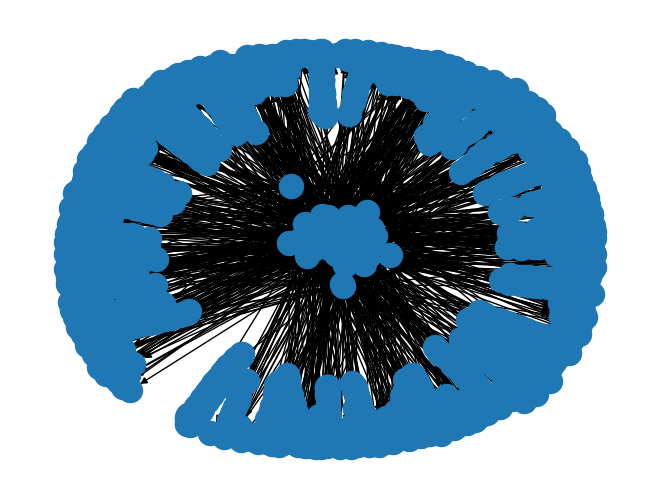

In [93]:
networkx.draw(nxgraph)

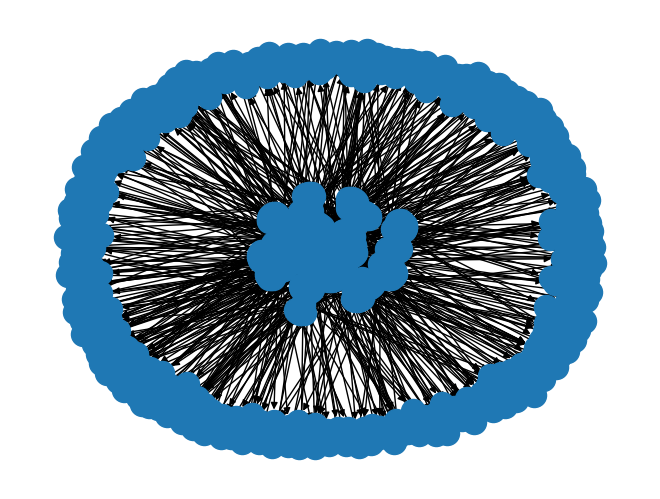

In [115]:
networkx.draw(test2.nxgraph)

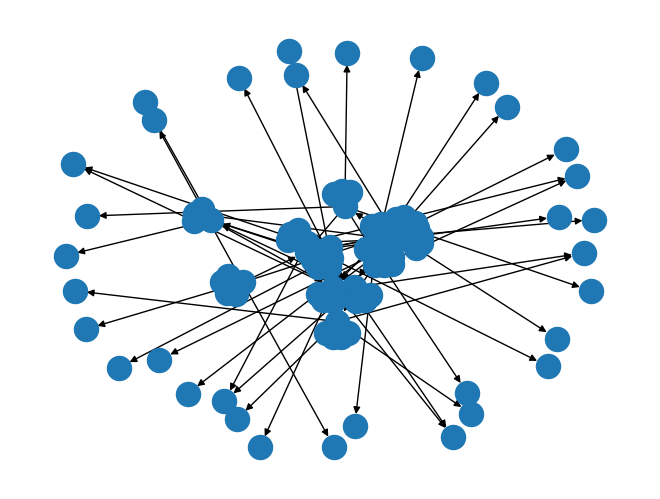

In [123]:
test3graph = networkx.DiGraph(test3.dictionary)
networkx.draw(test3graph)

Getting data from NIH

In [127]:
deets = work_info("W2329648702")

In [128]:
deets.funders

[]

In [194]:
deets.authors

['A5045437866',
 'A5011529063',
 'A5061755998',
 'A5021376490',
 'A5083068452',
 'A5014972879',
 'A5072113438',
 'A5090435894',
 'A5022108188',
 'A5079417623',
 'A5034963668']

In [193]:
deets.data["title"]


'Efficacy and Safety of a Specific Inhibitor of the BCR-ABL Tyrosine Kinase in Chronic Myeloid Leukemia'

In [141]:
accept = str({
  "criteria": {
    "useRelevance": True,
    "fiscalYears": [
      1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000
    ],
    "includeActiveProjects": True,
    "piNames": [
      {
        "firstName": "Charles",
        "lastName": "Sawyers",
      }
    ],
    "orgNames": [
    ],
  },
  "offset": 0,
  "limit": 100,
})

fullquery = "https://api.reporter.nih.gov/v2/projects/search"
#response = requests.get(fullquery, headers={"Accept": accept})
response = requests.get(fullquery)
response.raise_for_status()  # raises exception when not a 2xx response
if response.status_code != 204:
  data = response.json()


HTTPError: 405 Client Error: Method Not Allowed for url: https://api.reporter.nih.gov/v2/projects/search

In [152]:
# Call an API
response = requests.post('https://api.reporter.nih.gov/v2/projects/search', json= {
    "criteria": {
        "foa": [
            "RFA-DA-18-020",
            "PAR-18-218",
            "PAR-18-219",
            "RFA-DA-19-002",
            "RFA-DA-19-019",
            "RFA-DA-19-020",
            "RFA-EB-18-003",
            "RFA-NS-18-041",
            "RFA-NS-18-042",
            "RFA-NS-18-043",
            "RFA-NS-18-046",
            "RFA-NS-19-010",
            "RFA-NS-19-016",
            "RFA-NS-19-017",
            "RFA-NS-19-018",
            "RFA-NS-19-020",
            "RFA-NS-19-036"
        ]
    },
    "include_fields": [
        "ApplId","SubprojectId","FiscalYear","Organization", "ProjectNum",
        "ProjectNumSplit","ContactPiName","AllText","FullStudySection",
        "ProjectStartDate","ProjectEndDate"    
    ],
    "offset": 10,
    "limit": 10,
    "sort_field": "appl_id",
    "sort_order": "desc"
 })
response.raise_for_status() # check for errors
print(response.status_code)
data = response.json()["results"]

200


In [153]:
print(data)

[{'appl_id': 10673373, 'subproject_id': None, 'fiscal_year': 2022, 'org_name': 'NIRSUM LABORATORIES, INC.', 'org_city': 'NEW YORK', 'org_state': 'NY', 'org_state_name': None, 'dept_type': None, 'project_num': '4UH3DA048234-03', 'project_serial_num': 'DA048234', 'org_country': 'UNITED STATES', 'organization': {'org_name': 'NIRSUM LABORATORIES, INC.', 'city': None, 'country': None, 'org_city': 'NEW YORK', 'org_country': 'UNITED STATES', 'org_state': 'NY', 'org_state_name': None, 'dept_type': None, 'fips_country_code': None, 'org_duns': ['080559041'], 'org_ueis': ['JQEHSCRCNRT5'], 'primary_duns': '080559041', 'primary_uei': 'JQEHSCRCNRT5', 'org_fips': 'US', 'org_ipf_code': '10045586', 'org_zipcode': '10281', 'external_org_id': 10045586}, 'award_type': '4N', 'activity_code': 'UH3', 'award_amount': 3056516, 'is_active': True, 'is_territory': False, 'project_num_split': {'appl_type_code': '4', 'activity_code': 'UH3', 'ic_code': 'DA', 'serial_num': '048234', 'support_year': '03', 'full_suppor

In [154]:
# Call an API
response = requests.post('https://api.reporter.nih.gov/v2/projects/search', json= {
"criteria": {
    "useRelevance": True,
    "fiscalYears": [
      1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000
    ],
    "includeActiveProjects": True,
    "piNames": [
      {
        "firstName": "Charles",
        "lastName": "Sawyers",
      }
    ],
    "orgNames": [
    ],
  },
    "include_fields": [
        "ApplId","SubprojectId","FiscalYear","Organization", "ProjectNum",
        "ProjectNumSplit","ContactPiName","AllText","FullStudySection",
        "ProjectStartDate","ProjectEndDate"    
    ],
    "offset": 10,
    "limit": 10,
    "sort_field": "appl_id",
    "sort_order": "desc"
 })
response.raise_for_status() # check for errors
print(response.status_code)
data2 = response.json()["results"]

200


In [155]:
print(data2)

[{'appl_id': 10894366, 'subproject_id': None, 'fiscal_year': 2023, 'org_name': 'EMORY UNIVERSITY', 'org_city': 'ATLANTA', 'org_state': 'GA', 'org_state_name': None, 'dept_type': 'PSYCHIATRY', 'project_num': '3R01MH117009-05S1', 'project_serial_num': 'MH117009', 'org_country': 'UNITED STATES', 'organization': {'org_name': 'EMORY UNIVERSITY', 'city': None, 'country': None, 'org_city': 'ATLANTA', 'org_country': 'UNITED STATES', 'org_state': 'GA', 'org_state_name': None, 'dept_type': 'PSYCHIATRY', 'fips_country_code': None, 'org_duns': ['066469933'], 'org_ueis': ['S352L5PJLMP8'], 'primary_duns': '066469933', 'primary_uei': 'S352L5PJLMP8', 'org_fips': 'US', 'org_ipf_code': '2384501', 'org_zipcode': '303221007', 'external_org_id': 2384501}, 'award_type': '3', 'activity_code': 'R01', 'award_amount': 117503, 'is_active': True, 'is_territory': False, 'project_num_split': {'appl_type_code': '3', 'activity_code': 'R01', 'ic_code': 'MH', 'serial_num': '117009', 'support_year': '05', 'full_support_

In [165]:
response = requests.get("https://reporter.nih.gov/search/d0OXG08v6EyMkF4iMtqpRA/patents")
response.raise_for_status()
print(response.status_code)
print(response.text)

200
<!doctype html><html lang="en"><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width,initial-scale=1"><script type="text/javascript" src="/ruxitagentjs_ICA2NVfghjqru_10267230522124059.js" data-dtconfig="rid=RID_-2047122551|rpid=141194308|domain=nih.gov|reportUrl=/rb_9ce569e2-298f-40d4-a938-feb7df5ee3e9|app=611b5bc1cdd55364|featureHash=ICA2NVfghjqru|vcv=2|rdnt=1|uxrgce=1|bp=3|cuc=7w6h3zrz|mel=100000|dpvc=1|md=mdcc1=aa#user-icon.dropdown-toggle,mdcc2=cnewuser,mdcc3=aul#user-menu.pull-right|ssv=4|lastModification=1689812326060|tp=500,50,0,1|agentUri=/ruxitagentjs_ICA2NVfghjqru_10267230522124059.js"></script><link rel="icon" href="/favicon.ico"><link href="https://fonts.googleapis.com/css?family=Roboto:400,500,700|Roboto+Condensed|Roboto+Mono&display=swap" rel="stylesheet"><title>RePORT &rang; RePORTER</title><script>(function () {
      var g = function (e, h, f, g) {
        this.get = function (a) { for (va

In [185]:
from requests_html import AsyncHTMLSession
from requests_html import HTMLSession

asession = AsyncHTMLSession()
session = HTMLSession()

r = asession.get('https://reporter.nih.gov/search/d0OXG08v6EyMkF4iMtqpRA/patents')

r.html.render()

# async def get_site():
#     r = await asession.get("https://reporter.nih.gov/search/d0OXG08v6EyMkF4iMtqpRA/patents")

# response = session.run(get_site)
# # r.html.render()  # this call executes the js in the page

# response.html.render()

# r = session.get("https://reporter.nih.gov/search/d0OXG08v6EyMkF4iMtqpRA/patents")

AttributeError: '_asyncio.Future' object has no attribute 'html'

In [187]:
r = session.get('http://python-requests.org')

# r.html.render()

# r.html.search('Python 2 will retire in only {months} months!')['months']


ConnectionError: HTTPConnectionPool(host='python-requests.org', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fcefdd1be50>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [196]:
work_ids = ["W2276696977", "W2083091935", "W4254122075", "W2122883220"]

In [198]:
print(deets.references)

['W120676909', 'W1480179919', 'W1484834653', 'W1663227557', 'W1972804480', 'W1998593414', 'W2006518962', 'W2006917576', 'W2016086822', 'W2033989981', 'W2040396943', 'W2076372887', 'W2107582371', 'W2123070759', 'W2299298734', 'W2312804644', 'W2314938037', 'W2400188205']


In [202]:
papers = works_graph(work_ids)

In [203]:
papers.make_graph()

W2065630930 5
W2142962849 4
W2122883220 4
W2069023125 2
W2096003848 2
W2065630930
W2142962849
W2069023125
W2096003848
W2081638226 3
W1975954941 2
W1719330231 1
W2014702667 1
W1655336816 0
W2081638226
W1975954941
W1719330231
W2014702667
W1655336816
W2065630930 4
W2069023125 3
W2047604959 2
W2096003848 2
W2131924812 2
W2065630930
W2069023125
W2047604959
W2096003848
W2131924812
W2083091935 4
W2081638226 3
W2040396943 2
W2085307511 2
W2124132224 2
W2081638226
W2040396943
W2085307511
W2124132224
W2005654549 2
W1970930330 2
W1968525362 1
W2009886857 0
W2090982381 0
W2005654549
W1970930330
W1968525362
W2009886857
W2090982381
W132753393 1
W2008353412 1
W2032819570 1
W2034421194 1
W198522398 0
W132753393
W2008353412
W2032819570
W2034421194
W198522398
W138013088 4
W1988636548 0
W2049765895 0
W1995874739 0
W2323167910 0
W138013088
W1988636548
W2049765895
W1995874739
W2323167910
W1970930330 2
W2047224624 0
W2021033166 0
W2001535881 0
W2041399083 0
W2047224624
W2021033166
W2001535881
W2041399083
W2

HTTPError: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/W2031442174

In [213]:
new_dict = {}
for i in papers.dictionary:
    if len(papers.dictionary[i]) > 0:
        new_dict[i] = papers.dictionary[i]

In [205]:
papersgraph = networkx.DiGraph(papers.dictionary, directed = True)

In [214]:
sparsepapersgraph = networkx.DiGraph(new_dict, directed = True)

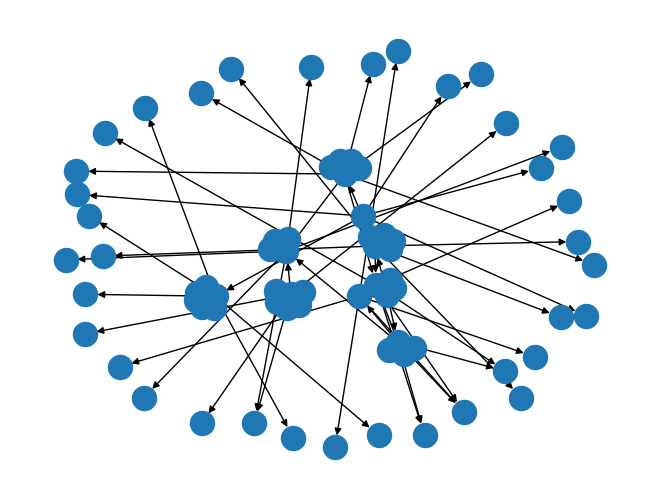

In [207]:
networkx.draw(papersgraph)

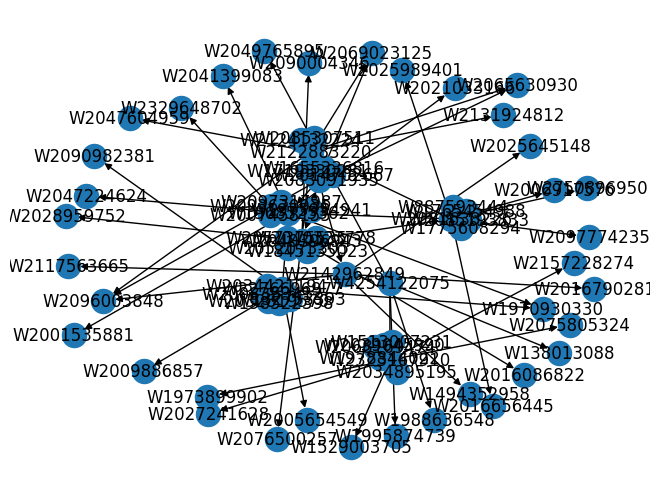

In [220]:
networkx.draw(sparsepapersgraph, with_labels = True)

In [212]:
for paper in work_ids:
    print(papers.data_dictionary[paper].institutions)

['I161318765', 'I161318765', 'I161318765', 'I161318765', 'I161318765']
['I161318765']
[]
['I161318765', 'I161318765', 'I161318765']
